In [56]:
import pandas as pd
import os
from pathlib import Path

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

In [58]:
path = "../../../data/raw/Housing.csv"
path=Path(os.getcwd()).parent.parent.parent / "data" / "raw" / "Housing.csv"


In [59]:
df_housing = pd.read_csv(path)

In [60]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [61]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [62]:
len(df_housing)

545

In [63]:
df_housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

<Axes: >

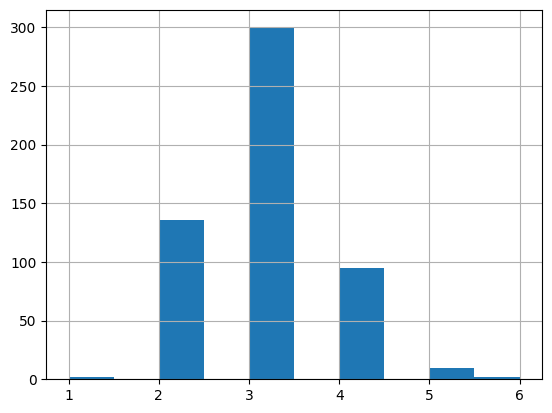

In [64]:
df_housing["bedrooms"].hist()

<Axes: >

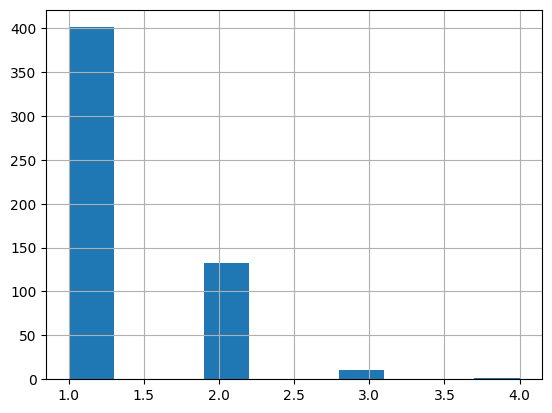

In [65]:
df_housing["bathrooms"].hist()


<Axes: >

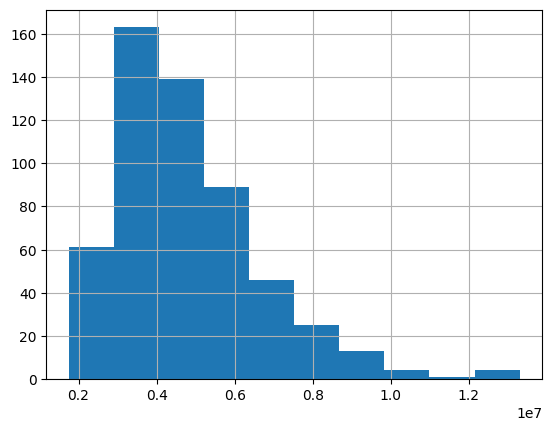

In [66]:
df_housing["price"].hist()

In [67]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [68]:


# 1. Load data
df = pd.read_csv("../../../data/raw/Housing.csv")

In [69]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [71]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [72]:


# 2. Select columns
numerical_features = ["area", "bathrooms", "stories", "parking", "bedrooms"]
binary_features = ["airconditioning", "prefarea"]
nominal_features = ["furnishingstatus"]
target = "price"

selected_columns = numerical_features + binary_features + nominal_features + [target]
df = df[selected_columns]

# 3. Encode binary features as 0/1
for col in binary_features:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# 4. Preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('bin', binary_pipeline, binary_features),
    ('nom', nominal_pipeline, nominal_features)
])

# 5. Split data
X = df.drop(columns=[target])
y = df[target]

In [73]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Fit-transform train, transform test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_processed = preprocessor.transform(X)


In [74]:
X_train_processed.shape

(436, 10)

In [75]:
X_train_processed

array([[0.29896907, 0.33333333, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.3814433 , 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.14886598, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.19587629, 0.33333333, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.16426117, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.26460481, 0.33333333, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [76]:
X_test_processed[0]

array([0.29209622, 0.33333333, 0.33333333, 0.33333333, 0.6       ,
       0.        , 0.        , 0.        , 0.        , 1.        ])

In [77]:

# 7. Get feature names for processed data
nominal_encoded_cols = preprocessor.named_transformers_['nom'].named_steps['onehot'].get_feature_names_out(nominal_features)
all_feature_names = numerical_features + binary_features + list(nominal_encoded_cols)

# 8. Create DataFrames and add target
train_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
train_df[target] = y_train.values

test_df = pd.DataFrame(X_test_processed, columns=all_feature_names)
test_df[target] = y_test.values

full_df = pd.DataFrame(X, columns=all_feature_names)
full_df[target] = y.values
# 9. Save to CSV
train_df.to_parquet("../../../data/staged/train.parquet", index=False)
test_df.to_parquet("../../../data/staged/test.parquet", index=False)
full_df.to_parquet("../../../data/staged/full.parquet", index=False)

print("Saved processed train and test sets to data/staged/")

Saved processed train and test sets to data/staged/


In [78]:
train_df

,area,bathrooms,stories,parking,bedrooms,airconditioning,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,0.298969,0.333333,1.000000,0.333333,0.4,1.0,0.0,1.0,0.0,0.0,7525000
1,0.381443,0.333333,0.000000,1.000000,0.4,1.0,0.0,0.0,1.0,0.0,6300000
2,0.148866,0.000000,0.000000,0.666667,0.2,1.0,0.0,1.0,0.0,0.0,3920000
3,0.065979,0.000000,0.333333,0.000000,0.4,0.0,1.0,0.0,0.0,1.0,3430000
4,0.144330,0.000000,0.333333,0.000000,0.4,0.0,0.0,0.0,0.0,1.0,3010000
...,...,...,...,...,...,...,...,...,...,...,...
431,0.298969,0.333333,1.000000,0.000000,0.6,1.0,0.0,0.0,0.0,1.0,6755000
432,0.261168,0.333333,0.000000,0.000000,0.6,1.0,1.0,0.0,1.0,0.0,6160000
433,0.195876,0.333333,0.666667,0.333333,0.4,0.0,0.0,1.0,0.0,0.0,4340000
434,0.164261,0.000000,0.000000,0.000000,0.2,0.0,0.0,0.0,0.0,1.0,3290000


In [79]:
test_df.head()

,area,bathrooms,stories,parking,bedrooms,airconditioning,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,0.292096,0.333333,0.333333,0.333333,0.6,0.0,0.0,0.0,0.0,1.0,4060000
1,0.333333,0.333333,0.666667,0.000000,0.4,1.0,1.0,1.0,0.0,0.0,6650000
2,0.164261,0.000000,0.000000,0.000000,0.2,0.0,0.0,0.0,1.0,0.0,3710000
3,0.230241,0.000000,0.333333,0.000000,0.4,1.0,0.0,0.0,1.0,0.0,6440000
4,0.158763,0.000000,0.000000,0.000000,0.4,0.0,0.0,1.0,0.0,0.0,2800000


In [80]:
X_train.head()

,area,bathrooms,stories,parking,bedrooms,airconditioning,prefarea,furnishingstatus
46,6000,2,4,1,3,1,0,furnished
93,7200,2,1,3,3,1,0,semi-furnished
335,3816,1,1,2,2,1,0,furnished
412,2610,1,2,0,3,0,1,unfurnished
471,3750,1,2,0,3,0,0,unfurnished


In [81]:
y_train.head()

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
Name: price, dtype: int64

<Axes: ylabel='Frequency'>

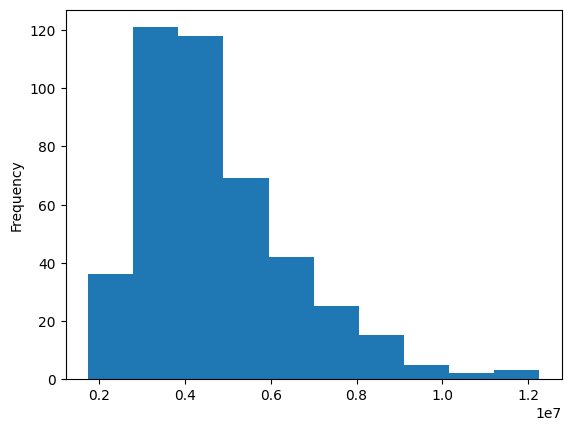

In [82]:
y_train.plot.hist()

<Axes: ylabel='Frequency'>

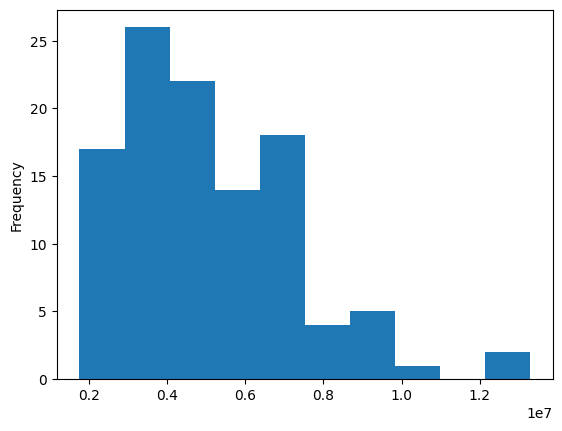

In [83]:
y_test.plot.hist()